Importing Modules:

"import my_utils as mu" is used for Packaging and Distributing Projects.

"import torch" to use pytorch.

"from torch import nn" gives access to various neural network layer types.

"from IPython import display" allows you to display an image from a file in a Jupyter notebook.





In [ ]:
import my_utils as mu
import torch
from torch import nn
from IPython import display

THE STEM:

Takes as input an image I of size HxW and divides it into Np non-overlapping patches.

Each patch pi,j has dimensions kxk.

Each patch is vectorized, and then transformed to a feature vector of dimensions d: xi,j = f(pi,j).

F can be a linear layer or a single hidden layer MLP.

All features are stored in matrix X is a subset of R^Npxd.


In [ ]:
batch_size = 256
train_dataset, test_dataset = mu.load_data_fashion_mnist(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
X, y = next(iter(train_dataset))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
class Net(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        num_hidden = 196
        self.Linear_Transform_1 = nn.Linear(num_inputs, num_hidden)
        self.relu = nn.ReLU(inplace=True)
        self.Linear_Transform_2 = nn.Linear(196, 4)
        self.Linear_Transform_3 = nn.Linear(4, 49)
        self.Linear_Transform_4 = nn.Linear(49, 72)

    
    def forward(self, x):
        #STEM
        patching_array = []
        unfolded = x.unfold(2, 14, 14).unfold(3, 14, 14)
        for x in unfolded:
          patching_array.append(torch.stack(list(torch.split(x.flatten(),4)), dim=0))
        stem_out = torch.stack(patching_array)

        #FIRST BLOCK
        XT = torch.transpose(stem_out,1,2) #FIRST MLP
        XT_W1 = self.Linear_Transform_1(XT)
        g_1 = self.relu(XT_W1)
        O1 = self.Linear_Transform_2(g_1)
        O1_T = torch.transpose(O1,1,2)

        O1_W3 = self.Linear_Transform_3(O1_T) #Second MLP
        g_2 = self.relu(O1_W3)
        O2 = self.Linear_Transform_4(g_2)
        
        #CLASSIFIER
        return_val = O2
        return return_val.mean(axis=1)

In [ ]:
# Model instantiation and initialisation 
def init_weights(m):
    if type(m) == nn.Linear: # by checking type we can init different layers in different ways
        torch.nn.init.normal_(m.weight, std=0.01)
        torch.nn.init.zeros_(m.bias)

In [ ]:
# Create and initialize your model here:
num_inputs, num_hidden, num_outputs = 196, 256, 10
net = Net(num_inputs, num_outputs)

# Initialise your model here using init_weights function. If not done, default initiliazation will be used.
net.apply(init_weights)

Net(
  (Linear_Transform_1): Linear(in_features=196, out_features=196, bias=True)
  (relu): ReLU(inplace=True)
  (Linear_Transform_2): Linear(in_features=196, out_features=4, bias=True)
  (Linear_Transform_3): Linear(in_features=4, out_features=49, bias=True)
  (Linear_Transform_4): Linear(in_features=49, out_features=72, bias=True)
)

In [ ]:
# Creare your loss here. Use Cross Entropy loss:
loss = nn.CrossEntropyLoss()
lr, wd = 0.01, 0.0005
# Creare your optimizer here. Use SGD with weight decay wd and learning rate lr.
optimizer = torch.optim.Adam(net.parameters(),weight_decay=wd,lr=lr)

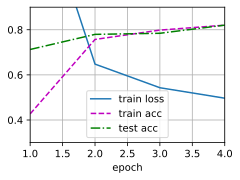

In [ ]:
num_epochs = 4
try:
    mu.train_ch3(net, train_dataset, test_dataset, loss, num_epochs, optimizer)
except AssertionError:
    pass

In [ ]:
mu.evaluate_accuracy(net, test_dataset)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.8204